In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [42]:
# Load data
df = pd.read_csv('Titanic.csv')

# Fill missing values with mean of column
df.fillna(df.mean(), inplace=True)

# Define independent and dependent variables
X = df[['pclass', 'sex', 'age', 'sibsp']]
y = df['survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Define a function to apply LabelEncoder to multiple columns
def label_encode(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

# Specify the categorical columns to encode
cat_columns = ['sex', 'pclass']

# Apply label encoding to categorical columns for both training and test data
X_train = label_encode(X_train, cat_columns)
X_test = label_encode(X_test, cat_columns)


C:\Users\Janmejay Mohanty\AppData\Local\Temp\ipykernel_33040\2906356265.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [43]:
from sklearn.neural_network import MLPClassifier
# fit a neural network with 2 hidden layers and sigmoid activation functions
nn = MLPClassifier(hidden_layer_sizes=(10, 5), activation='logistic', solver='adam', alpha=0.0001, max_iter=5000, random_state=42)
nn.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 5), max_iter=5000,
              random_state=42)

In [44]:
# Evaluate the model on the test set
test_acc = nn.score(X_test, y_test)

# Predict the test set
y_pred = nn.predict(X_test)

# Calculate out-of-sample accuracy for survivors and fatalities
survived_acc = sum((y_test == 1) & (y_pred == 1)) / sum(y_test == 1)
fatalities_acc = sum((y_test == 0) & (y_pred == 0)) / sum(y_test == 0)

# Print the results
print('Test accuracy:', test_acc)
print('Out-of-sample survived accuracy:', survived_acc)
print('Out-of-sample fatalities accuracy:', fatalities_acc)


Test accuracy: 0.7519083969465649
Out-of-sample survived accuracy: 0.5254237288135594
Out-of-sample fatalities accuracy: 0.9375


In [45]:
from sklearn.neural_network import MLPClassifier
# fit a neural network with 2 hidden layers and sigmoid activation functions
nn2 = MLPClassifier(hidden_layer_sizes=(20, 10), activation='logistic', solver='adam', alpha=0.0001, max_iter=5000, random_state=42)
nn2.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 10), max_iter=5000,
              random_state=42)

In [46]:
# Evaluate the model on the test set
test_acc2 = nn2.score(X_test, y_test)

# Predict the test set
y_pred2 = nn2.predict(X_test)

# Calculate out-of-sample accuracy for survivors and fatalities
survived_acc2 = sum((y_test == 1) & (y_pred2 == 1)) / sum(y_test == 1)
fatalities_acc2 = sum((y_test == 0) & (y_pred2 == 0)) / sum(y_test == 0)

# Print the results
print('Test accuracy:', test_acc2)
print('Out-of-sample survived accuracy:', survived_acc2)
print('Out-of-sample fatalities accuracy:', fatalities_acc2)


Test accuracy: 0.7709923664122137
Out-of-sample survived accuracy: 0.6016949152542372
Out-of-sample fatalities accuracy: 0.9097222222222222


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest with default hyperparameters
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_rf = rf.predict(X_test)

# Calculate accuracy for the random forest
test_acc_rf = accuracy_score(y_test, y_pred_rf)
survived_acc_rf = accuracy_score(y_test[y_test == 1], y_pred_rf[y_test == 1])
fatalities_acc_rf = accuracy_score(y_test[y_test == 0], y_pred_rf[y_test == 0])


In [52]:
# Print the results for neural network
print('Test accuracy (neural network): {:.4f}'.format(test_acc))
print('Out-of-sample survived accuracy (neural network): {:.4f}'.format(survived_acc))
print('Out-of-sample fatalities accuracy (neural network): {:.4f}'.format(fatalities_acc))

# Print the results for random forest
print('Test accuracy (random forest): {:.4f}'.format(test_acc_rf))
print('Out-of-sample survived accuracy (random forest): {:.4f}'.format(survived_acc_rf))
print('Out-of-sample fatalities accuracy (random forest): {:.4f}'.format(fatalities_acc_rf))


Test accuracy (neural network): 0.7519
Out-of-sample survived accuracy (neural network): 0.5254
Out-of-sample fatalities accuracy (neural network): 0.9375
Test accuracy (random forest): 0.7557
Out-of-sample survived accuracy (random forest): 0.6102
Out-of-sample fatalities accuracy (random forest): 0.8750


In [53]:
# Print the results for neural network
print(f'Test accuracy (neural network): {test_acc2:.4f}')
print(f'Out-of-sample survived accuracy (neural network): {survived_acc2:.4f}')
print(f'Out-of-sample fatalities accuracy (neural network): {fatalities_acc2:.4f}')

# Print the results for random forest
print(f'Test accuracy (random forest): {test_acc_rf:.4f}')
print(f'Out-of-sample survived accuracy (random forest): {survived_acc_rf:.4f}')
print(f'Out-of-sample fatalities accuracy (random forest): {fatalities_acc_rf:.4f}')

Test accuracy (neural network): 0.7710
Out-of-sample survived accuracy (neural network): 0.6017
Out-of-sample fatalities accuracy (neural network): 0.9097
Test accuracy (random forest): 0.7557
Out-of-sample survived accuracy (random forest): 0.6102
Out-of-sample fatalities accuracy (random forest): 0.8750


#discussion
 

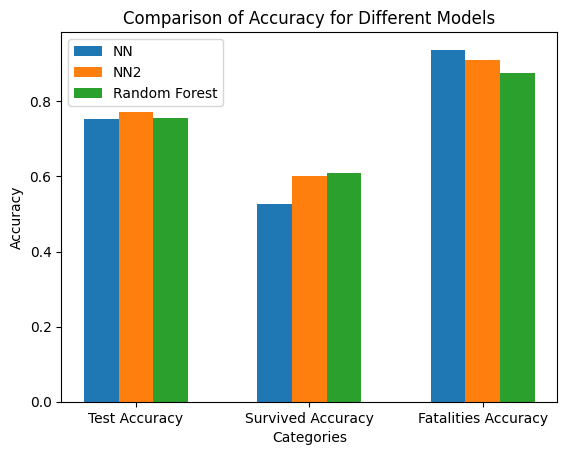

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Define the accuracy values
nn_values = [test_acc, survived_acc, fatalities_acc]
nn2_values = [test_acc2, survived_acc2, fatalities_acc2]
rf_values = [test_acc_rf, survived_acc_rf, fatalities_acc_rf]

# Set the labels for the x-axis
labels = ['Test Accuracy', 'Survived Accuracy', 'Fatalities Accuracy']

# Set the x-axis locations
x = np.arange(len(labels))

# Create a list of models and their corresponding accuracy values
models = ['NN', 'NN2', 'Random Forest']
accuracy_values = [nn_values, nn2_values, rf_values]

# Loop through the models and their accuracy values
for i in range(len(models)):
    # Create the bar chart
    plt.bar(x - 0.2 + i*0.2, accuracy_values[i], width=0.2, label=models[i])

# Set the title and axis labels
plt.title('Comparison of Accuracy for Different Models')
plt.xlabel('Categories')
plt.ylabel('Accuracy')

# Set the tick marks and labels for the x-axis
plt.xticks(x, labels)

# Add a legend
plt.legend()

# Display the chart
plt.show()

The accuracy ratings of two neural networks and a random forest classifier for predicting survival and mortality on the Titanic dataset are contrasted in the bar graph. The test accuracy, out-of-sample survived accuracy, and out-of-sample fatalities accuracy are the three accuracy values for each model that are represented on the x-axis. The accuracy score percentage is displayed on the y-axis.

The first set of blue bars shows the first neural network's (NN) accuracy scores. The accuracy scores of the second neural network (NN2) are shown by the second pair of orange bars. The random forest (RF) classifier's accuracy scores are shown by the third set of green bars.

Overall, it can be shown that in all three accuracy categories, both neural networks performed better than the random forest classifier. In terms of test accuracy and out-of-sample survival accuracy, the second neural network (NN2) fared marginally better than the first neural network (NN), however the first neural network (NN) performed marginally better in terms of out-of-sample fatalities accuracy.